In [25]:
# House Price Prediction

In [26]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# load datasets
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [28]:
# shape of datasets
print('train data shape:',train.shape)
print('test data shape:',test.shape)

train data shape: (1460, 81)
test data shape: (1459, 80)


In [29]:
#overview ofthe traning data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [30]:
# Analysing SalePrice
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

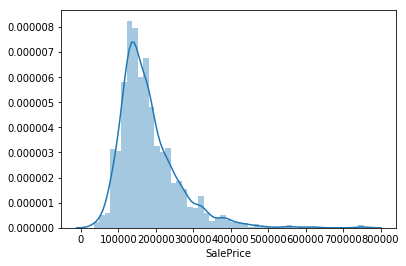

In [31]:
sns.distplot(train.SalePrice)

In [32]:
print('skew is:',train.SalePrice.skew())

skew is: 1.8828757597682129


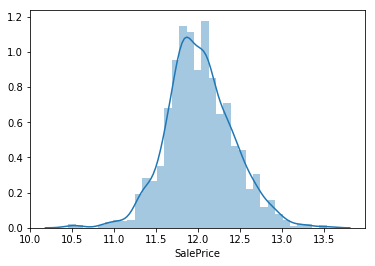

In [33]:
train.SalePrice=np.log(train.SalePrice)
sns.distplot(train.SalePrice)

In [34]:
# correlation matrix
corrmat=train.corr()
print(corrmat['SalePrice'].sort_values(ascending=False)[:10])
print(corrmat['SalePrice'].sort_values(ascending=False)[-10:])

SalePrice       1.000000
OverallQual     0.817184
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
Name: SalePrice, dtype: float64
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64


In [35]:
# Analysing top correlated features
cols=['SalePrice','OverallQual','GrLivArea','GarageArea','TotalBsmtSF',
      'FullBath','YearBuilt']

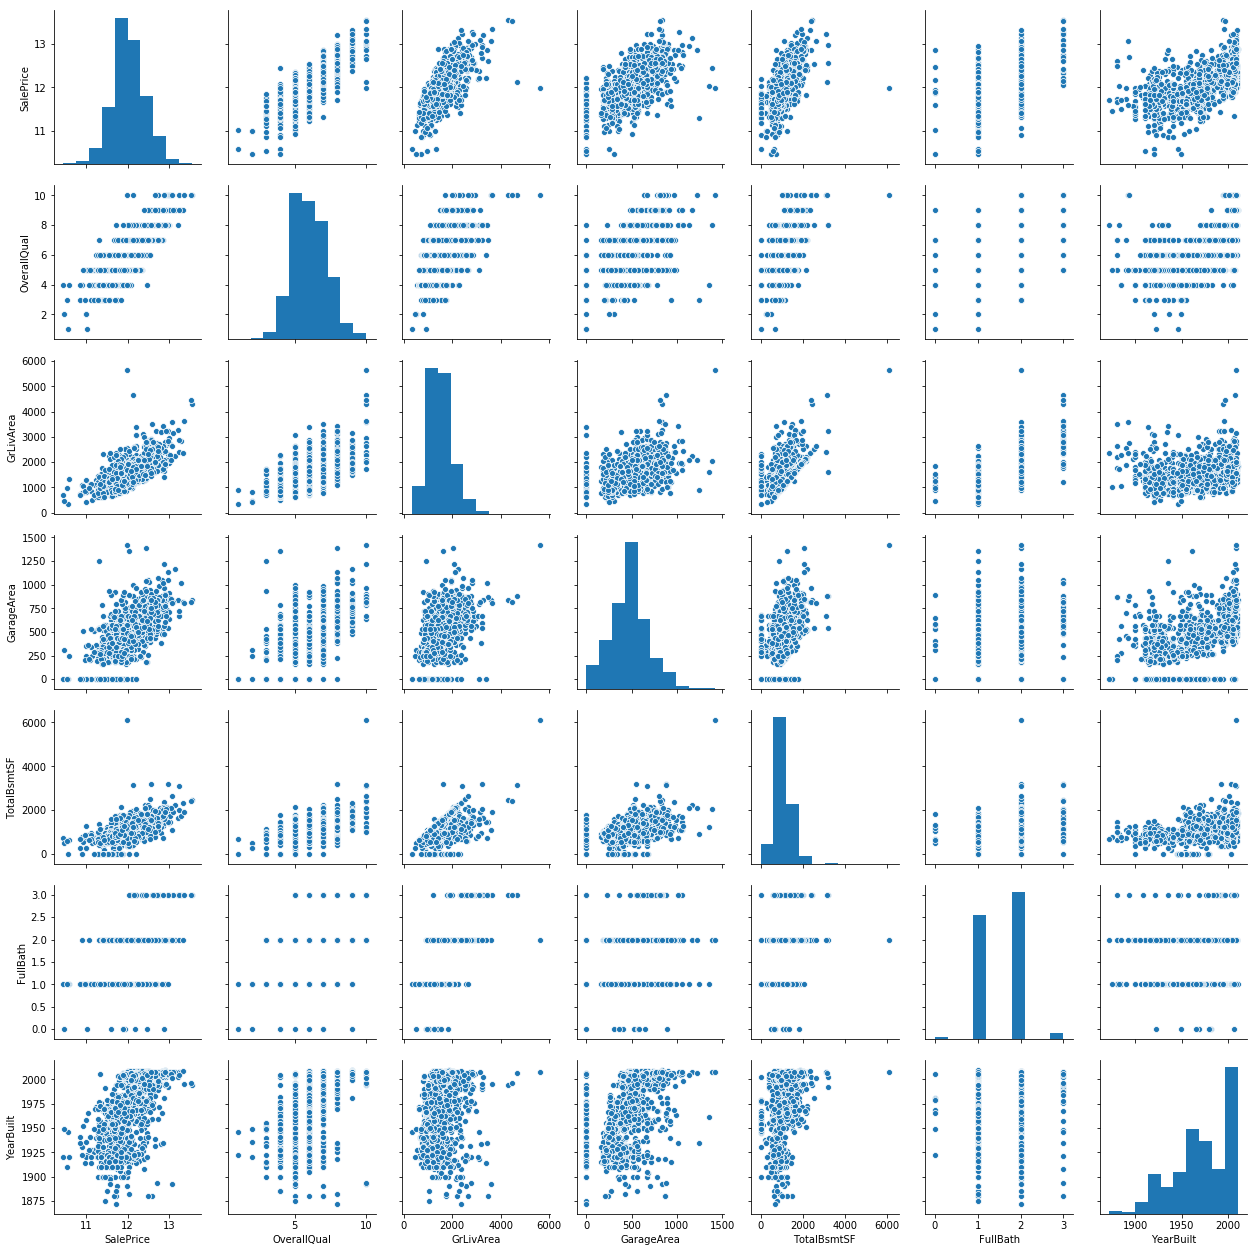

In [36]:
sns.pairplot(train[cols])

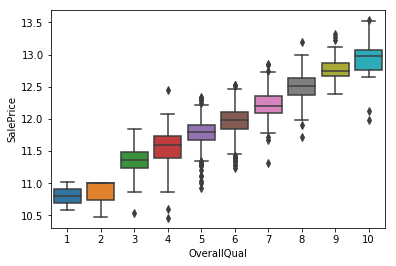

In [37]:
sns.boxplot(x='OverallQual',y='SalePrice', data=train)

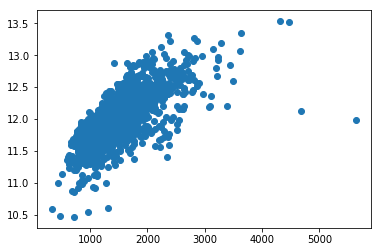

In [38]:
plt.scatter(x=train.GrLivArea,y=train.SalePrice)
plt.show()

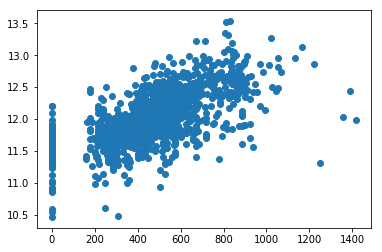

In [39]:
# Analysing GarageArea
plt.scatter(x=train.GarageArea,y=train.SalePrice)
plt.show()

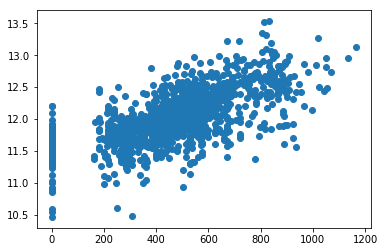

In [40]:
train=train[train.GarageArea<1200]
plt.scatter(x=train.GarageArea,y=train.SalePrice)
plt.show()

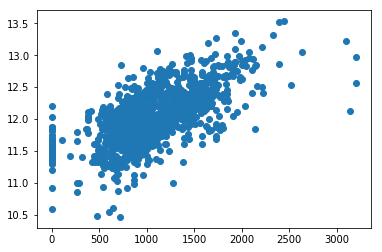

In [41]:
plt.scatter(x=train.TotalBsmtSF,y=train.SalePrice)
plt.show()

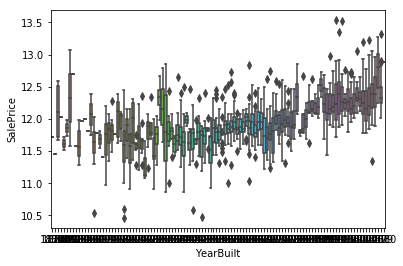

In [42]:
sns.boxplot(x='YearBuilt',y='SalePrice', data=train)

In [43]:
# dealing with missing-data
total=train.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train.isnull().count()*100).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','%'])
missing_data.head(20)

,Total,%
PoolQC,1449,99.587629
MiscFeature,1402,96.357388
Alley,1364,93.745704
Fence,1174,80.687285
FireplaceQu,689,47.353952
LotFrontage,258,17.731959
GarageCond,81,5.567010
GarageType,81,5.567010
GarageYrBlt,81,5.567010
GarageFinish,81,5.567010


In [44]:
train=train.drop((missing_data[missing_data['Total']>1]).index,axis=1)
train=train.drop((train.loc[train.Electrical.isnull()]).index,axis=0)

In [45]:
train.isnull().sum().max()

0

In [46]:
test=test.drop((missing_data[missing_data['Total']>1]).index,axis=1)

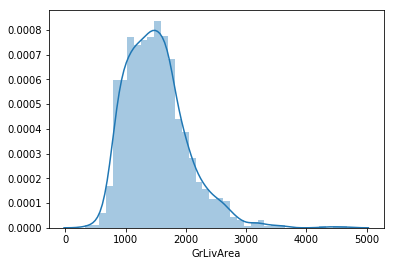

In [47]:
sns.distplot(train.GrLivArea)

In [48]:
print('skew is:',train.GrLivArea.skew())

skew is: 1.1235029160641883


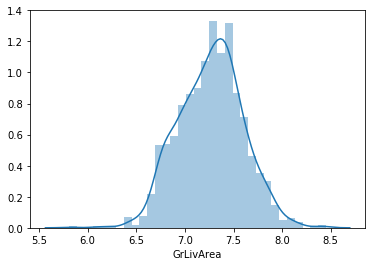

In [49]:
train.GrLivArea=np.log(train.GrLivArea)
sns.distplot(train.GrLivArea)

In [51]:
test.GrLivArea=np.log(test.GrLivArea)

In [52]:
#convert categorical variable into dummy
train=pd.get_dummies(train)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 0 to 1459
Columns: 221 entries, Id to SaleCondition_Partial
dtypes: float64(2), int64(33), uint8(186)
memory usage: 673.0 KB


In [53]:
test=pd.get_dummies(test)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 206 entries, Id to SaleCondition_Partial
dtypes: float64(9), int64(25), uint8(172)
memory usage: 632.7 KB


In [59]:
# Modelling
y=train.SalePrice
X= train.drop(['Id','SalePrice'],axis=1)

In [60]:
# train-test split of training datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, 
                                                    random_state = 0)

In [61]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
train_pred = regressor.predict(X_train)
test_pred = regressor.predict(X_test)

In [62]:
# mean_squared_error calculation
from sklearn.metrics import mean_squared_error
print ('MSE on train is: \n', mean_squared_error(train_pred, y_train))
print ('MSE on test is: \n', mean_squared_error(test_pred, y_test))

MSE on train is: 
 0.00791812728356149
MSE on test is: 
 0.015514661940840791


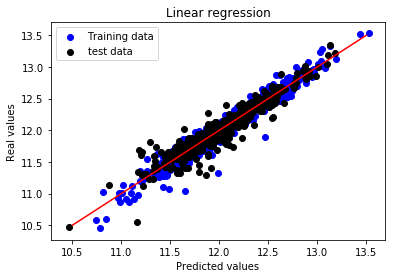

In [63]:
# Plot predictions - Real values
plt.scatter(train_pred, y_train, c = "blue",  label = "Training data")
plt.scatter(test_pred , y_test, c = "black",  label = "test data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

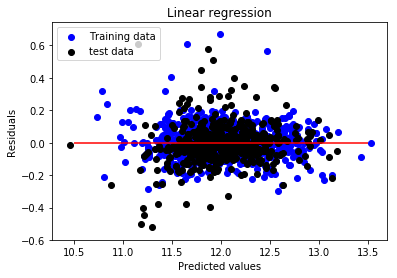

In [64]:
#plot between predicted values and residuals
plt.scatter(train_pred, train_pred - y_train, c = "blue",  label = "Training data")
plt.scatter(test_pred,test_pred - y_test, c = "black",  label = "test data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

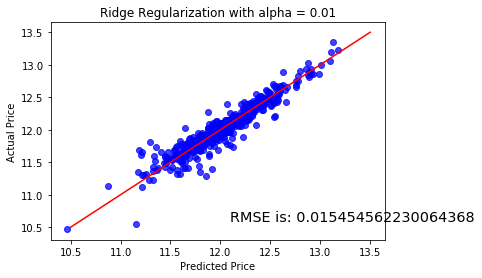

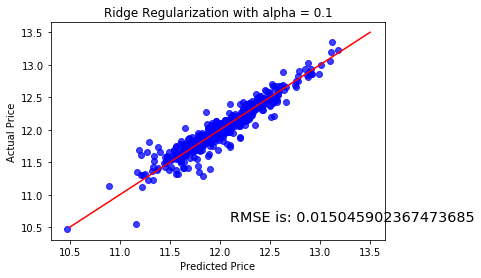

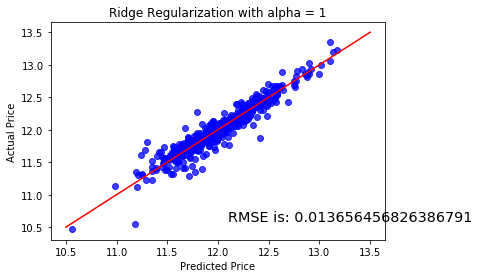

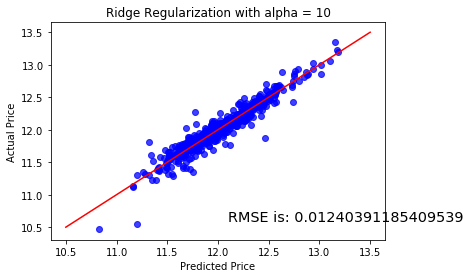

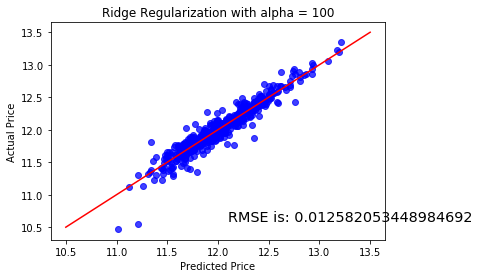

In [66]:
# Ridge regularisation
from sklearn.linear_model import Ridge
for i in range (-2, 3):
    alpha = 10**i
    rm = Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, y_test, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'RMSE is: {}'.format(
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
    plt.show()

In [67]:
coef = pd.Series(rm.coef_, index = pd.DataFrame(X_train).columns)

print("Ridge picked " + str(sum(coef != 0)) + 
      " variables and eliminated the other " +  str(sum(coef == 0)) +
      " variables")

Ridge picked 213 variables and eliminated the other 6 variables


In [68]:
# Submission file
submission=pd.DataFrame()
submission['Id']=test.Id

In [69]:
# Get missing columns in the test set
missing_cols = set( train.columns ) - set( test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test = test[train.columns]

test=test.drop(['Id','SalePrice'],axis=1)
test = test.interpolate()

In [70]:
rm = Ridge(alpha=10)
ridge_model = rm.fit(X_train, y_train)
predictions= ridge_model.predict(test)

In [71]:
final_prediction=np.exp(predictions)

In [72]:
print ("Final predictions are: \n", final_prediction[:5])

Final predictions are: 
 [120293.59333392 154251.03633939 175530.04611562 201241.35588181
 196983.03883736]


In [73]:
submission['SalePrice']=final_prediction
submission.head()

,Id,SalePrice
0,1461,120293.593334
1,1462,154251.036339
2,1463,175530.046116
3,1464,201241.355882
4,1465,196983.038837


In [74]:
submission.to_csv('HP_submission.csv', index=False)